# Приоритизация гипотез и анализ результатов A/B-тест

Часть 1. [Приоритизация гипотез](#one)
1. [Открытие и изучение файла с данными](#one.1)
2. [Применение фреймворка ICE для приоритизации гипотез](#one.2)
3. [Применение фреймворка RICE для приоритизации гипотез](#one.3)
4. [Выводы](#one.4)

Часть 2. [Анализ A/B-теста](#two)
1. [Открытие и изучение файлов с данными](#two.1)
2. [Графический анализ результатов](#two.2)
3. [Анализ выбросов](#two.3)
4. [Cтатистическая значимость результатов](#two.4)
5. [Выводы](#two.5)

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Настройка отображения результатов
pd.set_option('precision', 3)
pd.set_option('display.max_columns', 50)
pd.options.mode.chained_assignment = None
pd.options.display.max_colwidth = 150
pd.options.display.float_format = '{:.3f}'.format

## Часть 1. Приоритизация гипотез <a class="anchor" id="one"></a>

Совместно с отделом маркетинга подготовлен список гипотез для увеличения выручки интернет-магазина.
Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы необходимо приоритизировать.

### Открытие и изучение файла с данными  <a class="anchor" id="one.1"></a>

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
hypothesis.columns = hypothesis.columns.str.lower()
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В таблице `hypothesis` содержится следующая информация о 9 гипотезах по увеличению выручки интернет-магазина:
* hypothesis — краткое описание гипотезы;
* reach — охват пользователей по 10-балльной шкале;
* impact — влияние на пользователей по 10-балльной шкале;
* confidence — уверенность в гипотезе по 10-балльной шкале;
* efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение efforts, тем дороже проверка гипотезы.

### Применение фреймворка ICE для приоритизации гипотез  <a class="anchor" id="one.2"></a>

In [3]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)) 

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Наиболее перспективные гипотезы по ICE: 
* №9 "Запустить акцию, дающую скидку на товар в день рождения"
* №1 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* №8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

### Применение фреймворка RICE для приоритизации гипотез  <a class="anchor" id="one.3"></a>

In [4]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])\
                    / hypothesis['efforts']
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)) 

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000


Наиболее перспективные гипотезы по RICE:
* №8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
* №3 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
* №1 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

### Выводы  <a class="anchor" id="one.4"></a>

<div style="border:solid  black  2px; padding: 20px">

Метод RICE, в отличие от ICE, также включает оценку количества пользователей, затрагиваемых планируемым изменением. Учет данного параметра существенно повлиял на итоговую оценку приоритета гипотез №3 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" (высокая оценка охвата пользователей) и №9 "Запустить акцию, дающую скидку на товар в день рождения" (низкая оценка охвата пользователей). Гипотезам №1 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и №8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" присваивается высокий приоритет вне зависимости от используемого метода оценки.

## Часть 2. Анализ A/B-теста <a class="anchor" id="two"></a>

Получены результаты A/B-тест. Необходимо провести их анализ.

### Открытие и изучение файлов с данными  <a class="anchor" id="two.1"></a>

In [5]:
orders = pd.read_csv('orders.csv')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
visits = pd.read_csv('visitors.csv')
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
# Проверка на дубликаты
visits.duplicated().sum()

0

In [8]:
orders.duplicated().sum()

0

In [9]:
# Корректировка форматов
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
#orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d')
orders['revenue'] = orders['revenue'].astype('float')

In [10]:
orders['date'].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [11]:
visits['date'].describe()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [12]:
# Группы A/B-теста
groups = orders[['visitorId','group']].drop_duplicates()
groups_size = groups.groupby('group').agg({'visitorId': 'count'})
groups_size['ratio'] = groups_size['visitorId'].map(lambda x: x / groups_size['visitorId'].sum())
groups_size

,visitorId,ratio
group,,
A,503,0.462
B,586,0.538


In [13]:
# Кол-во пользователей, которые попали в обе группы
groups['visitorId'].duplicated().sum()

58

Результаты проведения А/В-теста содержатся в 2 таблицах:
1. таблица `orders`
    * transactionId — идентификатор заказа;
    * visitorId — идентификатор пользователя, совершившего заказ;
    * date — дата, когда был совершён заказ;
    * revenue — выручка заказа;
    * group — группа A/B-теста, в которую попал заказ.
2. таблица `visits`
    * date — дата;
    * group — группа A/B-теста;
    * visitors — количество пользователей в указанную дату в указанной группе A/B-теста.
    
Тест проводится с 1 по 31 августа 2019 года (включительно). Дубликатов и пропусков в данных нет, однако возникают вопросы к разделению трафика теста. В группу A попало 46,2% пользователей, в группу B - 53,8% (**относительное различие количества пользователей около 14%**), при этом **58 пользователей (более 10% от пользователей в группах) одновременно попали в обе группы**, что может повлиять на качество результатов теста. Однако в связи с большой долей пользователей, попавших в обе группы, они не исключались из анализа. 

### Графический анализ результатов  <a class="anchor" id="two.2"></a>

In [14]:
# Подготовка данных для анализа
# создание массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# агрегированные кумулятивные данные о заказах 
orders_agg = (dates_groups
              .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                     .agg({
                         'date': 'max',
                         'group': 'max',
                         'transactionId': 'nunique',
                         'visitorId': 'nunique',
                         'revenue': 'sum'
                     }), axis = 1)
              .sort_values(by = ['date', 'group']))

# агрегированные кумулятивные данные о пользователях
visits_agg = (dates_groups
              .apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
                     .agg({
                         'date' : 'max', 
                         'group' : 'max', 
                         'visitors' : 'sum'
                     }), axis=1)
              .sort_values(by=['date','group']))

# объединение кумулятивных данных
cumulative_data = orders_agg.merge(visits_agg, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
display(cumulative_data.head())

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579.000,719,0.033
1,2019-08-01,B,21,20,101217.000,713,0.029
2,2019-08-02,A,44,38,242401.000,1338,0.033
3,2019-08-02,B,45,43,266748.000,1294,0.035
4,2019-08-03,A,68,62,354874.000,1845,0.037


In [15]:
# кумулятивные данные по дням
cumulativeA = cumulative_data[cumulative_data['group']=='A']
cumulativeB = cumulative_data[cumulative_data['group']=='B']
merged_cumulative = (cumulativeA
                     .merge(cumulativeB, on='date', how='left', suffixes=['A', 'B'])
                     .drop(['groupA', 'groupB'], axis=1))
display(merged_cumulative.head())

,date,ordersA,buyersA,revenueA,visitorsA,conversionA,ordersB,buyersB,revenueB,visitorsB,conversionB
0,2019-08-01,24,20,148579.000,719,0.033,21,20,101217.000,713,0.029
1,2019-08-02,44,38,242401.000,1338,0.033,45,43,266748.000,1294,0.035
2,2019-08-03,68,62,354874.000,1845,0.037,61,59,380996.000,1803,0.034
3,2019-08-04,84,77,425699.000,2562,0.033,78,75,489567.000,2573,0.030
4,2019-08-05,109,100,549917.000,3318,0.033,101,98,581995.000,3280,0.031


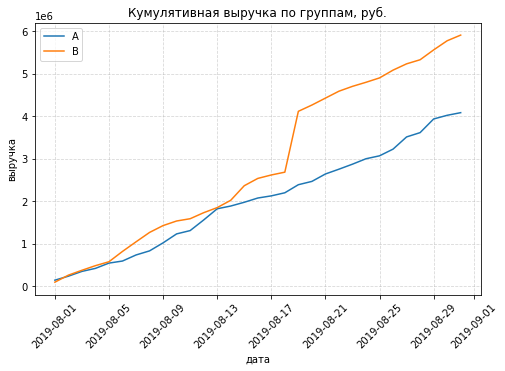

In [16]:
# График кумулятивной выручки по группам
plt.figure(figsize=(8,5))

plt.plot(cumulativeA['date'], cumulativeA['revenue'], label='A')
plt.plot(cumulativeB['date'], cumulativeB['revenue'], label='B')

plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.title("Кумулятивная выручка по группам, руб.")
plt.xlabel("дата")
plt.ylabel("выручка")
plt.show()

Выручка в группе A почти равномерно увеличивается в течение всего теста. Накопленная выручка в группе В на протяжении всего периода превышала аналогичный показатель в группе A, однако в одной точке наблюдается резкий скачек показателя, что может свидетельствовать о наличии выброса в данных.

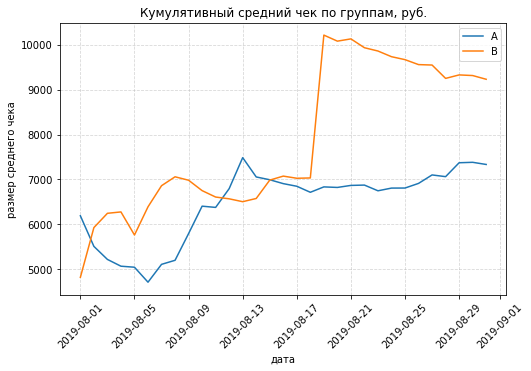

In [17]:
# График кумулятивного среднего чека по группам
plt.figure(figsize=(8,5))

plt.plot(cumulativeA['date'], cumulativeA['revenue']/cumulativeA['orders'], label='A')
plt.plot(cumulativeB['date'], cumulativeB['revenue']/cumulativeB['orders'], label='B')

plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.title("Кумулятивный средний чек по группам, руб.")
plt.xlabel("дата")
plt.ylabel("размер среднего чека")
plt.show()

Показатели кумулятивного среднего чека по группам в первой половине теста не стабильны, наблюдается несколько точек как резкого падения, так и резкого роста, что также сигнализирует о наличии выбросов. В то же время во второй половине теста данные начали выравниваться.

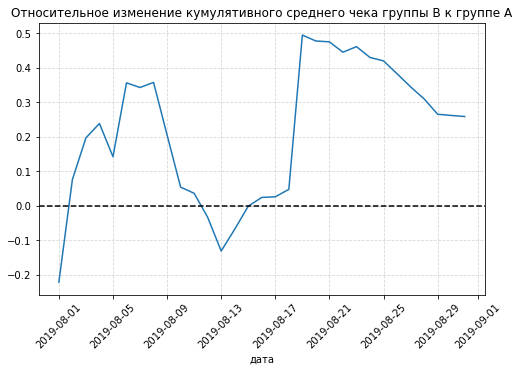

In [18]:
# Относительное изменение кумулятивного среднего чека группы B к группе A
plt.figure(figsize=(8,5))

plt.plot(merged_cumulative['date'], 
         (merged_cumulative['revenueB']/merged_cumulative['ordersB'])
         /(merged_cumulative['revenueA']/merged_cumulative['ordersA'])
         -1)

plt.axhline(y=0, color='black', linestyle='--')
plt.grid(linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A")
plt.xlabel("дата")
plt.show()

Как и ожидалось, из-за отдельных аномалий в данных показатель относительного изменения кумулятивного среднего чека группы B к группе A сильно "скачет".

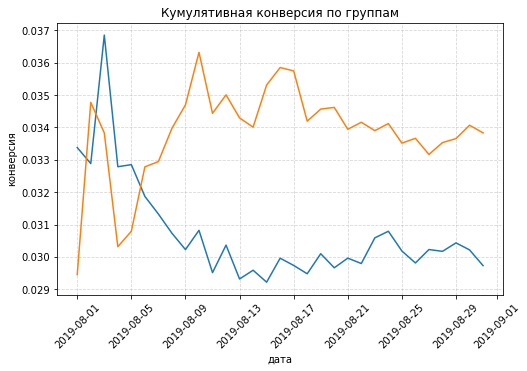

In [19]:
# График кумулятивной конверсии по группам
plt.figure(figsize=(8,5))

plt.plot(cumulativeA['date'], cumulativeA['conversion'], label='A')
plt.plot(cumulativeB['date'], cumulativeB['conversion'], label='B')

plt.grid(linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.title("Кумулятивная конверсия по группам")
plt.xlabel("дата")
plt.ylabel("конверсия")
plt.show()

После колебаний в начале тест показатели конверсии для групп стабилизировались. Конверсия группы B зафиксировалась на более высоком уровне.

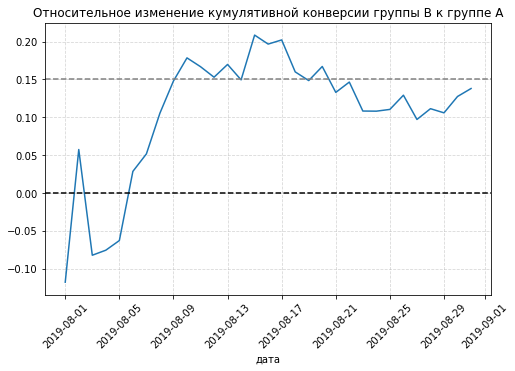

In [20]:
# График относительного изменения кумулятивной конверсии группы B к группе A
plt.figure(figsize=(8,5))

plt.plot(merged_cumulative['date'], merged_cumulative['conversionB']/merged_cumulative['conversionA']-1)

plt.grid(linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=.15, color='grey', linestyle='--')
plt.title("Относительное изменение кумулятивной конверсии группы B к группе A")
plt.xlabel("дата")
plt.show()

За исключением первых 5 дней теста накопленная конверсия в группе B стабильно превышала аналогичный показатель для группы A.

### Анализ выбросов  <a class="anchor" id="two.3"></a>

In [21]:
# Количество заказов по пользователям
orders_by_users = orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
orders_by_users.columns = ['visitorId','orders']
display(orders_by_users.sort_values(by='orders',ascending=False).head(10))

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


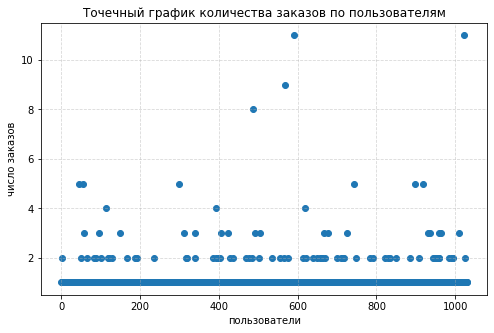

In [22]:
# Точечный график количества заказов по пользователям
plt.figure(figsize=(8,5))

x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])

plt.grid(linestyle='--', alpha=0.5)
plt.title("Точечный график количества заказов по пользователям")
plt.xlabel("пользователи")
plt.ylabel("число заказов")
plt.show()

In [23]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


Как правило, пользователи совершают не более одного, реже дух заказов за месяц. Не более 5% пользователей оформляли более 2 заказов, не более 1% - четырех. Однако есть отдельные пользователи, число заказов которых доходит до 11. Для получения более качественных результатов анализа из выборки удаляются пользователи, совершившие более 4 заказов.

In [24]:
# Стоимоть заказов
orders['revenue'].describe()

count      1197.000
mean       8348.006
std       39191.132
min          50.000
25%        1220.000
50%        2978.000
75%        8290.000
max     1294500.000
Name: revenue, dtype: float64

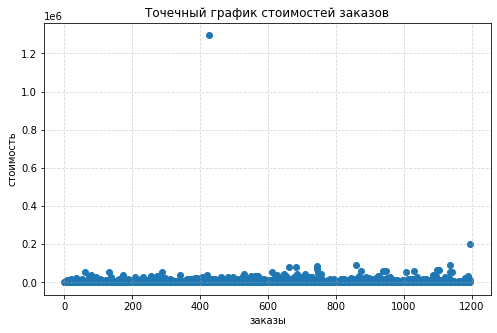

In [25]:
# Точечный график стоимостей заказов
plt.figure(figsize=(8,5))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.grid(linestyle='--', alpha=0.5)
plt.title("Точечный график стоимостей заказов")
plt.xlabel("заказы")
plt.ylabel("стоимость")
plt.show()

In [26]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


В данных по стоимости заказа есть явные аномалии (к примеру, заказ стоимостью более 1 млн руб.), об этом, в частности, свидетельствует сильное смещение вверх среднего значения относительно медианного. Стоимость 95% заказов не превышает 28000 тыс. руб., данное значение было выбрано в качестве границы для удаления аномально дорогих заказов.

### Cтатистическая значимость результатов  <a class="anchor" id="two.4"></a>

In [27]:
# Подготовка данных для анализа
# количество посещений в отдельную дату по группам
visitors_dailyA = visits[visits['group']=='A'][['date', 'visitors']]
visitors_dailyA.columns = ['date', 'visits_per_dateA']

visitors_dailyB = visits[visits['group']=='B'][['date', 'visitors']]
visitors_dailyB.columns = ['date', 'visits_per_dateB']

# количество заказов и выручка в отдельную дату по группам
orders_dailyA = (orders[orders['group']=='A']
                 .groupby('date', as_index=False)
                 .agg({'transactionId' : 'nunique', 
                       'revenue' : 'sum'}))
orders_dailyA.columns = ['date', 'orders_per_dateA', 'revenue_per_dateA']

orders_dailyB = (orders[orders['group']=='B']
                 .groupby('date', as_index=False)
                 .agg({'transactionId' : 'nunique', 
                       'revenue' : 'sum'}))
orders_dailyB.columns = ['date', 'orders_per_dateB', 'revenue_per_dateB']

data = (visitors_dailyA
        .merge(visitors_dailyB, on='date')
        .merge(orders_dailyA, on='date')
        .merge(orders_dailyB, on='date'))
display(data.head())

,date,visits_per_dateA,visits_per_dateB,orders_per_dateA,revenue_per_dateA,orders_per_dateB,revenue_per_dateB
0,2019-08-01,719,713,24,148579.000,21,101217.000
1,2019-08-02,619,581,20,93822.000,24,165531.000
2,2019-08-03,507,509,24,112473.000,16,114248.000
3,2019-08-04,717,770,16,70825.000,17,108571.000
4,2019-08-05,756,707,25,124218.000,23,92428.000


In [28]:
# количество заказов по пользователям по группам
orders_by_usersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
orders_by_usersA.columns = ['visitorId', 'orders']

orders_by_usersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
orders_by_usersB.columns = ['visitorId', 'orders']

In [29]:
# Cтатистическая значимость различий в конверсии между группами по «сырым» данным
sampleA = pd.concat([orders_by_usersA['orders'],
                     pd.Series(0, index=np.arange(data['visits_per_dateA'].sum() - len(orders_by_usersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([orders_by_usersB['orders'],
                     pd.Series(0, index=np.arange(data['visits_per_dateB'].sum() - len(orders_by_usersB['orders'])), 
                               name='orders')],axis=0)

alpha = .05 # критический уровень статистической значимости

results = stats.mannwhitneyu(sampleA, sampleB)

print('P-value: {0:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
print('Относительный прирост конверсии группы B: {0:.1%}'.format(sampleB.mean()/sampleA.mean()-1))

P-value: 0.008
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост конверсии группы B: 13.8%


In [30]:
# Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
alpha = .05 # критический уровень статистической значимости

results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                             orders[orders['group']=='B']['revenue'])

print('P-value: {0:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
print('Относительные различия в среднем чеке между группами: {0:.1%}'.format(
    orders[orders['group']=='B']['revenue'].mean()
    /orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.365
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительные различия в среднем чеке между группами: 25.9%


In [31]:
# Аномальные пользователи (выбросы)
# пользоватлеи с аномально большим числом заказов
many_orders = pd.concat([orders_by_usersA[orders_by_usersA['orders'] > 4]['visitorId'], 
                         orders_by_usersB[orders_by_usersB['orders'] > 4]['visitorId']], axis = 0)

# пользоватлеи с аномально дорогими заказами
expensive_orders = orders[orders['revenue'] > 28000]['visitorId']

anomal_users = pd.concat([many_orders, expensive_orders], axis = 0).drop_duplicates().sort_values()
print(anomal_users.head(5))
print(anomal_users.shape)

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorId, dtype: int64
(59,)


59 пользователей входят в число, совершивших аномально много или аномально дорогие заказы.

In [32]:
# Cтатистическая значимость различий в конверсии между группами по «очищенным» данным
sampleA_filtered = pd.concat([orders_by_usersA[~orders_by_usersA['visitorId'].isin(anomal_users)]['orders'],
                              pd.Series(0, index=np.arange(data['visits_per_dateA'].sum() - len(orders_by_usersA['orders'])),
                                        name='orders')],axis=0)

sampleB_filtered = pd.concat([orders_by_usersB[~orders_by_usersB['visitorId'].isin(anomal_users)]['orders'],
                              pd.Series(0, index=np.arange(data['visits_per_dateB'].sum() - len(orders_by_usersB['orders'])),
                                        name='orders')],axis=0)

alpha = .05 # критический уровень статистической значимости

results = stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)

print('P-value: {0:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
print('Относительный прирост конверсии группы B: {0:.1%}'.format(sampleB_filtered.mean()/sampleA_filtered.mean()-1))

P-value: 0.009
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост конверсии группы B: 14.5%


In [33]:
# Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным
alpha = .05 # критический уровень статистической значимости

results = stats.mannwhitneyu(
    orders[(orders['group']=='A') & (~orders['visitorId'].isin(anomal_users))]['revenue'],
    orders[(orders['group']=='B') & (~orders['visitorId'].isin(anomal_users))]['revenue'])

print('P-value: {0:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

print('Относительные различия в среднем чеке между группами: {0:.1%}'.format(
    orders[(orders['group']=='A') & (~orders['visitorId'].isin(anomal_users))]['revenue'].mean()/
    orders[(orders['group']=='B') & (~orders['visitorId'].isin(anomal_users))]['revenue'].mean()-1))

P-value: 0.481
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительные различия в среднем чеке между группами: 1.4%


Как на "сырых" так и на "очищенных" данных статистически значимо различие в конверсии между группами. На выборке, очищенной от выбросов, оценка относительного прироста конверсии группы B к группе A составляет 14.5%. В то же время нет статистически значимого различия в среднем чеке между группами ни по «сырым», ни по данным после фильтрации аномалий.

### Выводы <a class="anchor" id="two.5"></a>

<div style="border:solid  black  2px; padding: 20px">
    
* A/B-тест проводился с 1 по 31 августа 2019 года (включительно). Дубликатов и пропусков в данных с результатами теста нет, однако возникают вопросы к разделению трафика теста. В группу A попало 46,2% пользователей, в группу B - 53,8% (относительное различие количества пользователей около 14%), при этом 58 пользователей (более 10% от пользователей в группах) одновременно попали в обе группы, что потенциально может повлиять на качество результатов теста. Однако в связи с большой долей пользователей, попавших в обе группы, они не исключались из анализа.
    
***Итоги графического анализа***
* Выручка в группе A почти равномерно увеличивается в течение всего теста. Накопленная выручка в группе В на протяжении всего периода превышала аналогичный показатель в группе A, однако в одной точке наблюдается резкий скачек показателя, что может свидетельствовать о наличии выброса в данных. 
* Показатели кумулятивного среднего чека по группам в первой половине теста не стабильны, наблюдается несколько точек как резкого падения, так и резкого роста, что также сигнализирует о наличии выбросов. В то же время во второй половине теста данные начали выравниваться. Как и ожидалось, из-за отдельных аномалий в данных показатель относительного изменения кумулятивного среднего чека группы B к группе A сильно "скачет".
* После колебаний в начале тест показатели конверсии для групп стабилизировались. Конверсия группы B зафиксировалась на более высоком уровне. Так, за исключением первых 5 дней теста накопленная конверсия в группе B стабильно превышала аналогичный показатель для группы A.  

***Очистка выбросов***
* Как правило, пользователи совершают не более одного, реже дух заказов за месяц. Не более 5% пользователей оформляли более 2 заказов, не более 1% - четырех. Однако есть отдельные пользователи, число заказов которых доходит до 11. Для получения более качественных результатов анализа из выборки удаляются пользователи, совершившие более 4 заказов.
* В данных по стоимости заказа есть явные аномалии (к примеру, заказ стоимостью более 1 млн руб.), об этом, в частности, свидетельствует сильное смещение вверх среднего значения относительно медианного. Стоимость 95% заказов не превышает 28000 тыс. руб., данное значение было выбрано в качестве границы для удаления аномально дорогих заказов.
* 59 пользователей входят в число, совершивших аномально много или аномально дорогие заказы.  
    
***Статистическая значимость результатов теста***
* Как на "сырых" так и на "очищенных" данных статистически значимо различие в конверсии между группами. На выборке, очищенной от выбросов, оценка относительного прироста конверсии группы B к группе A составляет 14.5%.
* В то же время нет статистически значимого различия в среднем чеке между группами ни по «сырым», ни по данным после фильтрации аномалий.
    
***Графический анализ свидетельствует о том, что кумулятивные показатели ближе к концу теста стабилизировались. Конверсия в группе B стабильно начала превышать аналогичный показатель для группы A, при этом данный результат статистически значим. Значимых различий в среднем чеке между группами установить не удалось. В целом, тест целесообразно остановить, зафиксировав положительное влияние тестируемых изменений на показатель конверсии.***